### We process the data and prepare it for NLP processing. After the data is processed, we train it with BERT, then we train it with GPT-4. [Main One]

#####Here we train with the following filename: part-00000-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv

In [ ]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

In [ ]:
# !pip uninstall transformers
# !pip uninstall accelerate
# !pip install transformers[torch]
# !pip install accelerate

In [ ]:
#Load the dataset
df = pd.read_csv('train_data.csv')
print(df.shape[0])

#shuffle the data
df = shuffle(df, random_state=42)
df.head(5)

238687


,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
134671,0.000000,54.00,6.00,64.00,2.091184,2.091184,0.0,0.0,1.0,0.0,...,0.000000,54.00,8.336555e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-SynonymousIP_Flood
90689,0.473672,49688.11,16.78,63.40,3678.708159,3678.708159,0.0,0.0,0.0,0.0,...,35.029228,79.87,8.301583e+07,9.5,11.096000,49.675071,9628.060149,0.20,141.55,DoS-UDP_Flood
147725,0.000025,57.84,6.22,64.64,731.861744,731.861744,0.0,0.0,1.0,0.0,...,5.326821,55.74,8.308982e+07,9.5,10.538452,7.546432,179.621249,0.29,141.55,DDoS-SYN_Flood
9181,0.000000,0.00,1.00,64.00,26.218551,26.218551,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.312779e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
183494,0.000000,54.00,6.00,64.00,8.848873,8.848873,0.0,1.0,0.0,1.0,...,0.000000,54.00,8.334832e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood


In [ ]:
#Check how many unique data are there in the last column
print(df['label'].unique())
len(df['label'].unique())

['DDoS-SynonymousIP_Flood' 'DoS-UDP_Flood' 'DDoS-SYN_Flood'
 'DDoS-ICMP_Flood' 'DDoS-RSTFINFlood' 'DDoS-UDP_Flood' 'DDoS-PSHACK_Flood'
 'Mirai-udpplain' 'Recon-PortScan' 'DDoS-TCP_Flood' 'Mirai-greip_flood'
 'Mirai-greeth_flood' 'DDoS-ICMP_Fragmentation' 'DoS-TCP_Flood'
 'DDoS-ACK_Fragmentation' 'DoS-SYN_Flood' 'XSS' 'MITM-ArpSpoofing'
 'DNS_Spoofing' 'BenignTraffic' 'DDoS-UDP_Fragmentation' 'DoS-HTTP_Flood'
 'Recon-OSScan' 'Recon-HostDiscovery' 'VulnerabilityScan'
 'DDoS-HTTP_Flood' 'DDoS-SlowLoris' 'CommandInjection'
 'DictionaryBruteForce' 'BrowserHijacking' 'SqlInjection'
 'Uploading_Attack' 'Backdoor_Malware' 'Recon-PingSweep']


34

In [ ]:
print("Ip" in df["Protocol Type"].values)
# We decided to drop protocol type because it consists of only integers in our dataset

False


In [ ]:
#check if there are missing data in any of the columns
df.isnull().sum()

flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
label              0
dtype: int64

In [ ]:
#Check if there're 'nan' in any of the columns
df.isna().sum()

flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
label              0
dtype: int64

In [ ]:
#Check if there're any 'nan' values in the dataset

df.isna().values.any()

False

In [ ]:
#Replace all missing data with 'nan' and all 'nan' with mean for numeric data and mode for categoric data
# df['label'].fillna(df['label'].mode()[0], inplace=True)

# df.fillna(df.mean(), inplace=True)

In [ ]:
#List all unique labels
print(df['label'].unique())

#Total number of unique labels
len(df['label'].unique())

['DDoS-SynonymousIP_Flood' 'DoS-UDP_Flood' 'DDoS-SYN_Flood'
 'DDoS-ICMP_Flood' 'DDoS-RSTFINFlood' 'DDoS-UDP_Flood' 'DDoS-PSHACK_Flood'
 'Mirai-udpplain' 'Recon-PortScan' 'DDoS-TCP_Flood' 'Mirai-greip_flood'
 'Mirai-greeth_flood' 'DDoS-ICMP_Fragmentation' 'DoS-TCP_Flood'
 'DDoS-ACK_Fragmentation' 'DoS-SYN_Flood' 'XSS' 'MITM-ArpSpoofing'
 'DNS_Spoofing' 'BenignTraffic' 'DDoS-UDP_Fragmentation' 'DoS-HTTP_Flood'
 'Recon-OSScan' 'Recon-HostDiscovery' 'VulnerabilityScan'
 'DDoS-HTTP_Flood' 'DDoS-SlowLoris' 'CommandInjection'
 'DictionaryBruteForce' 'BrowserHijacking' 'SqlInjection'
 'Uploading_Attack' 'Backdoor_Malware' 'Recon-PingSweep']


34

In [ ]:
#There are 34 classes we need to predict, we narrow down the labels to 7 labels based on the data description
#The seven labels are ['DDoS' 'MIRAI' 'BenignTraffic' 'Web-Based' 'Recon' 'Spoofing' 'Brute_Force']
columnToUpdate = 'label'

#replace the data in the column with the specific data
# This is to see what'd happen if we use all DDOS labels
# df['label'].replace({
#     'DictionaryBruteForce': 'Brute_Force', 'MITM-ArpSpoofing': 'Spoofing', 'DNS_Spoofing': 'Spoofing',
#     'Recon-PingSweep': 'Recon', 'Recon-OSScan': 'Recon', 'VulnerabilityScan': 'Recon', 'Recon-PortScan': 'Recon',
#     'Recon-HostDiscovery': 'Recon', 'SqlInjection': 'Web-Based', 'CommandInjection': 'Web-Based',
#     'Backdoor_Malware': 'Web-Based', 'Uploading_Attack': 'Web-Based', 'XSS': 'Web-Based',
#     'BrowserHijacking': 'Web-Based', 'Mirai-greip_flood': 'MIRAI', 'Mirai-greeth_flood': 'MIRAI', 'Mirai-udpplain': 'MIRAI'
# }, inplace=True)


df['label'].replace({
    'DDoS-ACK_Fragmentation': 'DoS', 'DoS-UDP_Flood': 'DoS', 'DDoS-SlowLoris': 'DoS', 'DDoS-ICMP_Flood': 'DoS',
    'DDoS-RSTFINFlood': 'DoS', 'DDoS-PSHACK_Flood': 'DoS', 'DoS-HTTP_Flood': 'DoS', 'DoS-UDP_Fragmentation': 'DoS',
    'DDoS-UDP_Fragmentation': 'DoS', 'DDoS-SYN_Flood': 'DoS', 'DDoS-UDP_Flood': 'DoS', 'DoS-TCP_Flood': 'DoS', 'DDoS-HTTP_Flood': 'DoS',
    'DDoS-ICMP_Fragmentation': 'DoS', 'DoS-TCP_Flood': 'DoS', 'DoS-SYN_Flood': 'DoS', 'DDoS-SynonymousIP_Flood': 'DoS', 'DDoS-TCP_Flood': 'DoS',
    'DictionaryBruteForce': 'Brute_Force', 'MITM-ArpSpoofing': 'Spoofing', 'DNS_Spoofing': 'Spoofing',
    'Recon-PingSweep': 'Recon', 'Recon-OSScan': 'Recon', 'VulnerabilityScan': 'Recon', 'Recon-PortScan': 'Recon',
    'Recon-HostDiscovery': 'Recon', 'SqlInjection': 'Web-Based', 'CommandInjection': 'Web-Based',
    'Backdoor_Malware': 'Web-Based', 'Uploading_Attack': 'Web-Based', 'XSS': 'Web-Based',
    'BrowserHijacking': 'Web-Based', 'Mirai-greip_flood': 'MIRAI', 'Mirai-greeth_flood': 'MIRAI', 'Mirai-udpplain': 'MIRAI'
}, inplace=True)

In [ ]:
print(df['label'].unique())
len(df['label'].unique())

['DoS' 'MIRAI' 'Recon' 'Web-Based' 'Spoofing' 'BenignTraffic'
 'Brute_Force']


7

In [ ]:
df.sample(10)

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
210024,0.281059,23269.00,17.00,64.00,1687.704035,1687.704035,0.0,0.0,0.0,0.0,...,0.000000,50.00,8.310648e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DoS
56145,0.000000,54.00,6.00,64.00,1.492033,1.492033,0.0,0.0,0.0,0.0,...,0.000000,54.00,8.306827e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DoS
198799,0.000000,54.00,6.00,64.00,2.627258,2.627258,0.0,0.0,1.0,0.0,...,0.000000,54.00,8.308993e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DoS
163791,0.889386,95601.48,16.89,64.78,2566.791320,2566.791320,0.0,0.0,0.0,0.0,...,41.503287,99.56,8.301650e+07,9.5,11.447525,58.780593,15435.738657,0.28,141.55,DoS
230365,0.000000,54.00,6.00,64.00,8.185648,8.185648,0.0,0.0,0.0,0.0,...,0.000000,54.00,8.307638e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DoS
217531,0.102614,24549.00,16.83,63.36,5405.974468,5405.974468,0.0,0.0,0.0,0.0,...,0.114766,50.10,8.301590e+07,9.5,10.002813,0.163060,0.266149,0.05,141.55,DoS
32412,0.629312,166.00,6.00,64.00,5.101507,5.101507,0.0,0.0,0.0,1.0,...,0.000000,54.00,8.297262e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DoS
178360,0.000000,0.00,46.07,63.36,3.541952,3.541952,0.0,0.0,0.0,0.0,...,37.447949,568.02,8.357418e+07,9.5,33.247571,53.008085,7600.565649,0.19,141.55,MIRAI
62268,0.000000,0.00,1.00,64.00,1.991598,1.991598,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.313221e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DoS
133828,0.003078,2.22,46.59,64.58,23.568181,23.568181,0.0,0.0,0.0,0.0,...,23.582314,586.82,8.367695e+07,9.5,34.174868,33.389635,3606.853300,0.16,141.55,MIRAI


In [ ]:
#Check the number of each classes

df['label'].value_counts()

label
DoS              215053
MIRAI             13435
BenignTraffic      5600
Spoofing           2539
Recon              1860
Web-Based           137
Brute_Force          63
Name: count, dtype: int64

##### This is the data when we don't merge all DDOS labels into one DOS:

* DDoS-ICMP_Flood-            13791
* DDoS-UDP_Flood-             10277
* DDoS-TCP_Flood-              8560
* DDoS-PSHACK_Flood-           7905
* DDoS-SYN_Flood-              7720
* DDoS-RSTFINFlood-            7614
* DDoS-SynonymousIP_Flood-     6846
* DoS-UDP_Flood-               6388
* DoS-TCP_Flood-               5040
* MIRAI-                       4989
* DoS-SYN_Flood-               3809
* BenignTraffic-               2048
* Spoofing-                     956
* DDoS-ICMP_Fragmentation-      883
* Recon-                        689
* DDoS-UDP_Fragmentation-       572
* DDoS-ACK_Fragmentation-       539
* DoS-HTTP_Flood-               158
* Web-Based-                     55
* DDoS-HTTP_Flood-               55
* DDoS-SlowLoris-                36
* Brute_Force-                   20
Name: label, dtype: int64


This is the data when we merge all DDOS labels into one DOS:

DoS              215053
MIRAI             13435
BenignTraffic      5600
Spoofing           2539
Recon              1860
Web-Based           137
Brute_Force          63

###There's a massive class imbalance. Ensemble methods are much useful for class imbalanced dataset. In our case, we'll use a technique called
### SMOTE(Synthetic Minority Oversampling Technique) to create synthetic sample for the minority class.(talk to Dr. Nwafor about SMOTE/undersampling/oversampling)


### For now we'll use feature selection and use top 15 features for our NLP processsing


In [ ]:
# Total number of features

print(len(df.columns))

#There are a total of 47 features along with the prediction class

X_feat = df.drop('label', axis=1)
y_pred = df['label']

47


In [ ]:
# Calculate feature importance score of the features using random forest

# from sklearn.ensemble import RandomForestClassifier

# feat_labels = df.columns

# forest = RandomForestClassifier(n_estimators=10000, random_state=0)

# forest.fit(X_feat, y_pred)

# importances = forest.feature_importances_

# indices = np.argsort(importances)[::-1]



In [ ]:
# for f in range(X_feat.shape[1]):
#     print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

#### 20 most important features out of 46 different features are listed below:

 * 1) IAT                            0.162126
 * 2) Min                            0.099326
 * 3) Max                            0.074741
 * 4) Magnitue                       0.065267
 * 5) Tot sum                        0.062492
 * 6) AVG                            0.057049
 * 7) Tot size                       0.053733
 * 8) rst_count                      0.044186
 * 9) urg_count                      0.043751
 * 10) Protocol Type                  0.043225
 * 11) Header_Length                  0.032110
 * 12) Weight                         0.029878
 * 13) Number                         0.029586
 * 14) Variance                       0.028904
 * 15) flow_duration                  0.027473
 * 16) Covariance                     0.027198
 * 17) Std                            0.026167
 * 18) Radius                         0.024693
 * 19) Duration                       0.016576
 * 20) Rate                           0.008787

In [ ]:
df.sample(5)

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
20777,0.000891,743.67,6.11,66.50,23.979607,23.979607,0.0,0.0,0.0,0.0,...,543.036385,926.39,8.333657e+07,9.5,43.306350,767.978451,310579.277808,0.95,141.55,DoS
149956,0.006943,6138.00,16.83,63.36,21274.937590,21274.937590,0.0,0.0,0.0,0.0,...,0.309925,50.10,8.310288e+07,9.5,10.008791,0.439056,0.813503,0.12,141.55,DoS
122470,0.032073,59.10,6.00,64.00,3.015895,3.015895,0.0,0.0,1.0,0.0,...,0.000000,54.00,8.297269e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DoS
220576,0.000000,54.00,6.00,64.00,1.362718,1.362718,0.0,0.0,0.0,0.0,...,0.000000,54.00,8.306743e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DoS
97197,0.051169,59.38,6.00,63.83,2.209601,2.209601,0.0,1.0,0.0,1.0,...,0.279421,54.20,8.334844e+07,9.5,10.398982,0.396674,1.313486,0.06,141.55,DoS


####We have seven different classes and there's a massive class imbalance between the classes. The class with the highest number of data being 'DOS' at more than 215,053 data and the class with least number of data being bruteforce at 63. Thus, we'll only take 10% of the DOS data and rest of the data remains the same.

In [ ]:
seed = 42

# 10% of DOS data(215,053) being 21505
dos_class_subset = df[df['label'] == 'DoS'].sample(n=215052, random_state=seed)

# Select the rest of the data
rest_of_data = df[df['label'] != 'DoS']

nlp_df = pd.concat([dos_class_subset, rest_of_data], ignore_index=True)



In [ ]:
nlp_df['label'].value_counts()

label
DoS              215052
MIRAI             13435
BenignTraffic      5600
Spoofing           2539
Recon              1860
Web-Based           137
Brute_Force          63
Name: count, dtype: int64

In [ ]:
nlp_df.head(5)

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,162.00,17.00,64.00,32.281508,32.281508,0.0,0.0,0.0,0.0,...,0.000000,162.00,8.300819e+07,9.5,18.000000,0.000000,0.000000,0.00,141.55,DoS
1,0.000000,53.46,5.95,64.00,2.355036,2.355036,0.0,1.0,0.0,1.0,...,0.504970,54.44,8.334085e+07,9.5,10.404116,0.717466,5.152648,0.05,141.55,DoS
2,0.390289,1814.07,7.46,106.72,25.886391,25.886391,0.0,0.0,0.0,0.0,...,225.771919,216.42,8.303400e+07,9.5,17.238274,319.942752,222163.856038,0.93,141.55,DoS
3,4.891871,108.00,6.00,64.00,0.408842,0.408842,0.0,0.0,0.0,0.0,...,0.000000,54.00,8.295156e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DoS
4,0.000000,54.00,6.00,64.00,33.070413,33.070413,0.0,0.0,1.0,0.0,...,0.000000,54.00,8.309351e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DoS


In [ ]:
#shuffle the rows in nlp_df
nlp_df = nlp_df.sample(frac=1, random_state=42)
print(len(nlp_df))


238686


In [ ]:
from sklearn.model_selection import train_test_split


#Take 90% of the data for train and 10% for test
#df_train, df_test = train_test_split(nlp_df, train_size=0.9, random_state=42)
selected_columns = ['IAT', 'Min', 'Max', 'Magnitue', 'Tot sum', 'AVG', 'Tot size', 'rst_count', 'urg_count', 'Header_Length', 'label']
df_train = nlp_df[selected_columns].copy()


In [ ]:
df_train.head(10)

,IAT,Min,Max,Magnitue,Tot sum,AVG,Tot size,rst_count,urg_count,Header_Length,label
109624,8.334376e+07,54.0,54.00,10.392305,567.00,54.000000,54.00,0.00,0.00,54.00,DoS
91499,8.336566e+07,54.0,54.00,10.392305,567.00,54.000000,54.00,0.00,0.00,97.20,DoS
207472,8.334411e+07,54.0,54.00,10.392305,567.00,54.000000,54.00,0.00,0.00,54.00,DoS
9181,8.315064e+07,42.0,42.00,9.165151,441.00,42.000000,42.00,0.00,0.00,0.00,DoS
174585,8.315372e+07,42.0,42.00,9.165151,441.00,42.000000,42.00,0.00,0.00,0.00,DoS
231184,1.665220e+08,56.0,4410.00,48.921672,18187.40,1195.297646,695.50,1952.60,82.20,2075297.60,BenignTraffic
86051,8.297270e+07,54.0,56.78,10.414467,570.98,54.232377,54.63,0.04,0.02,58.54,DoS
87733,8.312465e+07,42.0,42.00,9.165151,441.00,42.000000,42.00,0.00,0.00,0.00,DoS
233930,8.376751e+07,554.0,554.00,33.286634,5817.00,554.000000,554.00,0.00,0.00,450125.00,MIRAI
26663,8.312874e+07,42.0,42.00,9.165151,441.00,42.000000,42.00,0.00,0.00,0.00,DoS


In [ ]:
#Get the minimum and maximum value pf each of the columns
columns_to_check = df_train.columns[df_train.columns != 'label']

min_values = df_train[columns_to_check].min()
max_values = df_train[columns_to_check].max()


In [ ]:
print("MINIMUM VALUES")
print(min_values)

print("MAXIMUM VALUES")
print(max_values)

MINIMUM VALUES
IAT               0.000000
Min              42.000000
Max              42.000000
Magnitue          9.165151
Tot sum          42.000000
AVG              42.000000
Tot size         42.000000
rst_count         0.000000
urg_count         0.000000
Header_Length     0.000000
dtype: float64
MAXIMUM VALUES
IAT              1.676394e+08
Min              3.236200e+03
Max              3.032920e+04
Magnitue         1.209754e+02
Tot sum          5.837100e+04
AVG              7.861105e+03
Tot size         1.309800e+04
rst_count        8.744500e+03
urg_count        2.984600e+03
Header_Length    9.809700e+06
dtype: float64


In [ ]:
df_train.head(5)

,IAT,Min,Max,Magnitue,Tot sum,AVG,Tot size,rst_count,urg_count,Header_Length,label
109624,8.334376e+07,54.0,54.0,10.392305,567.0,54.0,54.0,0.0,0.0,54.0,DoS
91499,8.336566e+07,54.0,54.0,10.392305,567.0,54.0,54.0,0.0,0.0,97.2,DoS
207472,8.334411e+07,54.0,54.0,10.392305,567.0,54.0,54.0,0.0,0.0,54.0,DoS
9181,8.315064e+07,42.0,42.0,9.165151,441.0,42.0,42.0,0.0,0.0,0.0,DoS
174585,8.315372e+07,42.0,42.0,9.165151,441.0,42.0,42.0,0.0,0.0,0.0,DoS


### We want to change the numerical values to categorical. We divide the numerical values into five groups where teh first one fifth is smallest and so on. It lasts till it reaches the highest one fifth.

In [ ]:
#We'll divide each columns into 5 parts(Minimal, Low, Moderate, Considerable, High)

import pandas as pd

# Selecting the numerical columns
numerical_columns = ['IAT', 'Min', 'Max', 'Magnitue', 'Tot sum', 'AVG', 'Tot size', 'rst_count', 'urg_count', 'Header_Length', 'label']

# Define the number of quantiles (groups)
num_groups = 5

# Create a new dataframe to store the categorized values
df_categorized = pd.DataFrame()

# Iterate over each numerical column
for column in numerical_columns:
    if column == 'label':
      df_categorized[column] = df_train['label']
    else:
      # Calculate quantiles
      quantiles = pd.qcut(df_train[column], num_groups, labels=False, duplicates='drop')

      # Assign categorical values based on quantiles
      categories = ['Minimal', 'Low', 'Moderate', 'Considerable', 'High']
      categorized_values = quantiles.apply(lambda x: categories[x])

      # Add categorized values to the new dataframe
      df_categorized[column] = categorized_values

# Display the resulting categorized dataframe
print(df_categorized)



                 IAT      Min      Max Magnitue  Tot sum      AVG Tot size  \
109624  Considerable      Low      Low      Low      Low      Low      Low   
91499           High      Low      Low      Low      Low      Low      Low   
207472  Considerable      Low      Low      Low      Low      Low      Low   
9181    Considerable  Minimal  Minimal  Minimal  Minimal  Minimal  Minimal   
174585  Considerable  Minimal  Minimal  Minimal  Minimal  Minimal  Minimal   
...              ...      ...      ...      ...      ...      ...      ...   
119879      Moderate  Minimal      Low      Low      Low      Low      Low   
103694      Moderate  Minimal  Minimal  Minimal  Minimal  Minimal  Minimal   
131932       Minimal  Minimal      Low      Low      Low      Low      Low   
146867  Considerable      Low      Low      Low      Low      Low      Low   
121958           Low      Low      Low      Low      Low      Low      Low   

       rst_count urg_count Header_Length label  
109624   Minim

In [ ]:
df_categorized.head(5)

,IAT,Min,Max,Magnitue,Tot sum,AVG,Tot size,rst_count,urg_count,Header_Length,label
109624,Considerable,Low,Low,Low,Low,Low,Low,Minimal,Minimal,Low,DoS
91499,High,Low,Low,Low,Low,Low,Low,Minimal,Minimal,Considerable,DoS
207472,Considerable,Low,Low,Low,Low,Low,Low,Minimal,Minimal,Low,DoS
9181,Considerable,Minimal,Minimal,Minimal,Minimal,Minimal,Minimal,Minimal,Minimal,Minimal,DoS
174585,Considerable,Minimal,Minimal,Minimal,Minimal,Minimal,Minimal,Minimal,Minimal,Minimal,DoS


In [ ]:
# Sentencify the data from the new dataset for training

def sentencify_train(dataframe):
  newColumn = []
  for index, row in dataframe.iterrows():
    sentence = (
        "A network connection in which the time difference with the previous packet was {iat}, minimum packet length in the flow was {minm}, maximum packet length "\
              "in the flow was {maxm}, magnitue was {magnitude}, sum of packet lengths in the flow was {tot_sum}, average packet length in the flow was {avg}, packet's length was {tot_size}, number "\
              "of packets with RST flag set in the same flow was {rst_count}, number of packets with URG flag set in the same flow was {urg_count} and the header length "\
              "was {header_length}, was a {attack_type} attack."
    ).format(
        iat=row['IAT'],
        minm=row['Min'],
        maxm=row['Max'],
        magnitude=row['Magnitue'],
        tot_sum=row['Tot sum'],
        avg=row['AVG'],
        tot_size=row['Tot size'],
        rst_count=row['rst_count'],
        urg_count=row['urg_count'],
        header_length=row['Header_Length'],
        attack_type=row['label']
    )
    newColumn.append(sentence)
  # print(len(newColumn))
  # print(newColumn[:100])
  with open('train_data.txt', 'a') as f:
    for s in newColumn:
      f.write(s + '\n')
  print("train data preparation succeeded")
  return newColumn


In [ ]:
all_train_data = sentencify_train(df_categorized)
#all_test_data = sentencify_train(df_test)

train data preparation succeeded


In [ ]:
# Sentencify the data from the new dataset for testing

def sentencify_test(dataframe):
  newColumn = []
  for index, row in dataframe.iterrows():
    sentence = (
        "A network connection in which the time difference with the previous packet was {iat}, minimum packet length in the flow was {minm}, maximum packet length "\
              "in the flow was {maxm}, magnitude was {magnitude}, sum of packet lengths in the flow was {tot_sum}, average packet length in the flow was {avg}, packet's length was {tot_size}, number "\
              "of packets with RST flag set in the same flow was {rst_count}, number of packets with URG flag set in the same flow was {urg_count} and the header length "\
              "was {header_length}, was a {attack_type} attack."
    ).format(
        iat=row['IAT'],
        minm=row['Min'],
        maxm=row['Max'],
        magnitude=row['Magnitue'],
        tot_sum=row['Tot sum'],
        avg=row['AVG'],
        tot_size=row['Tot size'],
        rst_count=row['rst_count'],
        urg_count=row['urg_count'],
        header_length=row['Header_Length'],
        attack_type='<mask>'
    )
    newColumn.append(sentence)
  result_df = pd.DataFrame({'input_data': newColumn, 'output_result': dataframe['label']})

  #Write only the sample/random 100 data to a new csv file for testing
  sampled_data = result_df.sample(n=100, random_state=42)
  sampled_data.to_csv('test_sample_data.csv', index=False)

  #Write the whole dataset to a new csv file for testing
  #result_df.to_csv('test_data.csv', index=False)  # This is for writing the whole dataset
  return "test data preparation succeeded"



In [ ]:
sentencify_test(df_categorized)

'test data preparation succeeded'

In [ ]:
# Sentencify the data from the new dataset for training

def sentencify_train_csv(dataframe):
  newColumn = []
  for index, row in dataframe.iterrows():
    sentence = (
        "A network connection in which the time difference with the previous packet was {iat}, minimum packet length in the flow was {minm}, maximum packet length "\
              "in the flow was {maxm}, magnitue was {magnitude}, sum of packet lengths in the flow was {tot_sum}, average packet length in the flow was {avg}, packet's length was {tot_size}, number "\
              "of packets with RST flag set in the same flow was {rst_count}, number of packets with URG flag set in the same flow was {urg_count} and the header length "\
              "was {header_length}, was a {attack_type} attack."
    ).format(
        iat=row['IAT'],
        minm=row['Min'],
        maxm=row['Max'],
        magnitude=row['Magnitue'],
        tot_sum=row['Tot sum'],
        avg=row['AVG'],
        tot_size=row['Tot size'],
        rst_count=row['rst_count'],
        urg_count=row['urg_count'],
        header_length=row['Header_Length'],
        attack_type=row['label']
    )
    newColumn.append(sentence)
  result_df = pd.DataFrame({'input_data': newColumn, 'label': dataframe['label']})

  #Write only the sample/random 100 data to a new csv file for testing
  # sampled_data = result_df.sample(n=100, random_state=42)
  result_df.to_csv('numeric_binary_class_numeric_train_4000_balanced.csv', index=False)

  #Write the whole dataset to a new csv file for testing
  #result_df.to_csv('test_data.csv', index=False)  # This is for writing the whole dataset
  return "gpt-train data preparation succeeded"


In [ ]:
sentencify_train_csv(df_categorized)

'gpt-train data preparation succeeded'

In [ ]:
print(all_train_data[1001])

A network connection in which the time difference with the previous packet was Low, minimum packet length in the flow was Low, maximum packet length in the flow was Low, magnitue was Low, sum of packet lengths in the flow was Low, average packet length in the flow was Low, packet's length was Low, number of packets with RST flag set in the same flow was Minimal, number of packets with URG flag set in the same flow was Minimal and the header length was Low, was a DoS attack.


###Train with BERT

In [ ]:
from transformers import RobertaTokenizer, RobertaForMaskedLM
import torch
import tensorflow as tf
from transformers import TFRobertaForMaskedLM, RobertaTokenizer

In [ ]:
model = TFRobertaForMaskedLM.from_pretrained("distilroberta-base")
tokenizer = RobertaTokenizer.from_pretrained("distilroberta-base")

All PyTorch model weights were used when initializing TFRobertaForMaskedLM.

All the weights of TFRobertaForMaskedLM were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForMaskedLM for predictions without further training.


In [ ]:
#Clean the test to remove stop words and punctuations
import regex as re
def clean_text(line):
    line = re.sub(r'-+',' ',line)
    line = re.sub(r'[^a-zA-Z, ]+'," ",line)
    line = re.sub(r'[ ]+'," ",line)
    line += "."
    return line

In [ ]:
text_lst = []
len_lst = []
for line in all_train_data:
  line = clean_text(line)
  text_lst.append(line)
  len_lst.append(len(line.split(" ")))

In [ ]:
# Tokenize the data
inputs = tokenizer(text_lst,max_length=100,truncation=True,padding='max_length',return_tensors='tf')


In [ ]:
inputs['labels'] = inputs['input_ids']
inputs.keys()

dict_keys(['input_ids', 'attention_mask', 'labels'])

In [ ]:
import tensorflow as tf


inp_ids = []
lbs = []
idx = 0
for inp in inputs.input_ids.numpy():
    actual_tokens = list(set(range(100)) -
                         set(np.where((inp == 101) | (inp == 102)
                            | (inp == 0))[0].tolist()))
    #We need to select 15% random tokens from the given list
    num_of_token_to_mask = int(len(actual_tokens)*0.15)
    token_to_mask = np.random.choice(np.array(actual_tokens),
                                     size=num_of_token_to_mask,
                                     replace=False).tolist()
    #Now we have the indices where we need to mask the tokens
    inp[token_to_mask] = 103
    inp_ids.append(inp)
    idx += 1
inp_ids = tf.convert_to_tensor(inp_ids)
inputs['input_ids'] = inp_ids


In [ ]:
#Training the model

# Define optimizer and loss function
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)


# Compile model
model.compile(optimizer=optimizer, loss=loss_function)

# Fine-tune model
history = model.fit(x={"input_ids": inputs["input_ids"], "attention_mask": inputs["attention_mask"]},
                    y=inputs["labels"],
                    verbose=1,
                    batch_size=8,
                    epochs=10)

Epoch 1/10
29836/29836 [==============================] - 1511s 50ms/step - loss: 0.0030
Epoch 2/10
29836/29836 [==============================] - 1486s 50ms/step - loss: 0.0020
Epoch 3/10
29836/29836 [==============================] - 1480s 50ms/step - loss: 0.0018
Epoch 4/10
29836/29836 [==============================] - 1480s 50ms/step - loss: 0.0016
Epoch 5/10
29836/29836 [==============================] - 1480s 50ms/step - loss: 0.0016
Epoch 6/10
29836/29836 [==============================] - 1478s 50ms/step - loss: 0.0015
Epoch 7/10
29836/29836 [==============================] - 1477s 49ms/step - loss: 0.0014
Epoch 8/10
29836/29836 [==============================] - 1479s 50ms/step - loss: 0.0014
Epoch 9/10
29836/29836 [==============================] - 1479s 50ms/step - loss: 0.0013
Epoch 10/10
29836/29836 [==============================] - 1481s 50ms/step - loss: 0.0013


In [ ]:
#Save the model in huggingface

from huggingface_hub import notebook_login

notebook_login()

In [ ]:
model.push_to_hub("mlm_soft_finetune_bert_full")
tokenizer.push_to_hub("mlm_soft_finetune_bert_full")

tf_model.h5:   0%|          | 0.00/485M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.61k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/ubaskota/mlm_soft_finetune_bert_full/commit/d76b53fda2ac3c779f111a988f2fbdee3a5bf8a1', commit_message='Upload tokenizer', commit_description='', oid='d76b53fda2ac3c779f111a988f2fbdee3a5bf8a1', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
data = "A network connection in which the time difference with the previous packet was High, minimum packet length in the flow was High, maximum packet length in the flow was Moderate, magnitue was Considerable, sum of packet lengths in the flow was Considerable, average packet length in the flow was Considerable, packet's length was Considerable, number of packets with RST flag set in the same flow was Minimal, number of packets with URG flag set in the same flow was Minimal and the header length was High, was a <mask> attack."

In [ ]:
from transformers import pipeline

mask_filler = pipeline("fill-mask", "ubaskota/mlm_soft_finetune_bert_full")
mask_filler(data, top_k=3)

config.json:   0%|          | 0.00/649 [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/485M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFRobertaForMaskedLM.

All the layers of TFRobertaForMaskedLM were initialized from the model checkpoint at ubaskota/mlm_soft_finetune_bert_full.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForMaskedLM for predictions without further training.


tokenizer_config.json:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/999k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/958 [00:00<?, ?B/s]

[{'score': 0.895527720451355,
  'token': 11,
  'token_str': ' in',
  'sequence': "A network connection in which the time difference with the previous packet was High, minimum packet length in the flow was High, maximum packet length in the flow was Moderate, magnitue was Considerable, sum of packet lengths in the flow was Considerable, average packet length in the flow was Considerable, packet's length was Considerable, number of packets with RST flag set in the same flow was Minimal, number of packets with URG flag set in the same flow was Minimal and the header length was High, was a in attack."},
 {'score': 0.027735143899917603,
  'token': 3635,
  'token_str': ' Min',
  'sequence': "A network connection in which the time difference with the previous packet was High, minimum packet length in the flow was High, maximum packet length in the flow was Moderate, magnitue was Considerable, sum of packet lengths in the flow was Considerable, average packet length in the flow was Considerabl

In [ ]:
mask_filler(data)[0]['token_str']

' in'

In [ ]:
data_list = ["A network connection in which the time difference with the previous packet was Minimal, minimum packet length in the flow was Moderate, maximum packet length in the flow was Considerable, magnitude was Considerable, sum of packet lengths in the flow was Considerable, average packet length in the flow was Considerable, packet's length was Considerable, number of packets with RST flag set in the same flow was Minimal, number of packets with URG flag set in the same flow was Minimal and the header lengthwas Considerable, was a <mask> attack.",
             "A network connection in which the time difference with the previous packet was High, minimum packet length in the flow was Moderate, maximum packet length in the flow was Considerable, magnitude was Considerable, sum of packet lengths in the flow was Considerable, average packet length in the flow was Considerable, packet's length was Considerable, number of packets with RST flag set in the same flow was Minimal, number of packets with URG flag set in the same flow was Minimal and the header lengthwas Minimal, was a <mask> attack.",
             "A network connection in which the time difference with the previous packet was Minimal, minimum packet length in the flow was Moderate, maximum packet length in the flow was Considerable, magnitude was Considerable, sum of packet lengths in the flow was Considerable, average packet length in the flow was Considerable, packet's length was Considerable, number of packets with RST flag set in the same flow was Low, number of packets with URG flag set in the same flow was Low and the header lengthwas High, was a <mask> attack.",
             "A network connection in which the time difference with the previous packet was Moderate, minimum packet length in the flow was Minimal, maximum packet length in the flow was Minimal, magnitude was Minimal, sum of packet lengths in the flow was Minimal, average packet length in the flow was Minimal, packet's length was Minimal, number of packets with RST flag set in the same flow was Minimal, number of packets with URG flag set in the same flow was Minimal and the header lengthwas Minimal, was a <mask> attack."]

In [ ]:
from transformers import pipeline

mask_filler = pipeline("fill-mask", "ubaskota/mlm_soft_finetune_bert_full")

tf_model.h5:   0%|          | 0.00/485M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFRobertaForMaskedLM.

All the layers of TFRobertaForMaskedLM were initialized from the model checkpoint at ubaskota/mlm_soft_finetune_bert_full.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForMaskedLM for predictions without further training.


tokenizer_config.json:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/999k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/958 [00:00<?, ?B/s]

In [ ]:
for data in data_list:
  predicted = mask_filler(data)[0]['token_str']
  print(predicted)

#Should be [DoS, DoS, MIRAI, DoS]

 was
 in
 was
 Low


In [ ]:
from transformers import AutoTokenizer

model_name = "ubaskota/mlm_finetune_bert"  # Replace with the model name or identifier you want to check

# Instantiate the tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name, use_fast=False)  # use_fast=False for compatibility

# Check if the tokenizer exists
if tokenizer is not None:
    print(f"The model '{model_name}' has a tokenizer.")
else:
    print(f"The model '{model_name}' does not have a tokenizer.")

The model 'ubaskota/mlm_finetune_bert' has a tokenizer.


In [ ]:
#Below this for OPENAI questions

#Load the dataset
df = pd.read_csv('test_data.csv')
print(df.shape[0])

#shuffle the data
df = shuffle(df, random_state=42)
df.head(5)

##This code is for OPENAI related issue


In [ ]:
#This code for OPENAI questions
from sklearn.utils import shuffle
#Load the dataset
df_test = pd.read_csv('test_data.csv')
print(df_test.shape[0])

#shuffle the data
df_test = shuffle(df_test, random_state=42)
df_test.head(5)

NameError: name 'pd' is not defined

In [ ]:
# df_test['label'].replace({
#     'DDoS-ACK_Fragmentation': 'DoS', 'DoS-UDP_Flood': 'DoS', 'DDoS-SlowLoris': 'DoS', 'DDoS-ICMP_Flood': 'DoS',
#     'DDoS-RSTFINFlood': 'DoS', 'DDoS-PSHACK_Flood': 'DoS', 'DoS-HTTP_Flood': 'DoS', 'DoS-UDP_Fragmentation': 'DoS',
#     'DDoS-UDP_Fragmentation': 'DoS', 'DDoS-SYN_Flood': 'DoS', 'DDoS-UDP_Flood': 'DoS', 'DoS-TCP_Flood': 'DoS', 'DDoS-HTTP_Flood': 'DoS',
#     'DDoS-ICMP_Fragmentation': 'DoS', 'DoS-TCP_Flood': 'DoS', 'DoS-SYN_Flood': 'DoS', 'DDoS-SynonymousIP_Flood': 'DoS', 'DDoS-TCP_Flood': 'DoS',
#     'DictionaryBruteForce': 'Brute_Force', 'MITM-ArpSpoofing': 'Spoofing', 'DNS_Spoofing': 'Spoofing',
#     'Recon-PingSweep': 'Recon', 'Recon-OSScan': 'Recon', 'VulnerabilityScan': 'Recon', 'Recon-PortScan': 'Recon',
#     'Recon-HostDiscovery': 'Recon', 'SqlInjection': 'Web-Based', 'CommandInjection': 'Web-Based',
#     'Backdoor_Malware': 'Web-Based', 'Uploading_Attack': 'Web-Based', 'XSS': 'Web-Based',
#     'BrowserHijacking': 'Web-Based', 'Mirai-greip_flood': 'MIRAI', 'Mirai-greeth_flood': 'MIRAI', 'Mirai-udpplain': 'MIRAI'
# }, inplace=True)


In [ ]:
print(df_test['label'].unique())
len(df_test['label'].unique())


['DoS' 'non-DoS']


2

In [ ]:
df_test['label'].value_counts()

DoS        215053
non-DoS     23634
Name: label, dtype: int64

In [ ]:
df_test = df_test.sample(100)

In [ ]:
#sentencify the data for openAI questions and processing

def sentencify_test_csv(dataframe):
  newColumn = []
  for index, row in dataframe.iterrows():
    #one of 'DoS' or 'MIRAI' or 'Recon' or 'Web-Based' or 'Spoofing' or 'BenignTraffic' or 'Brute_Force'. "
    sentence = (
        "What is the intrusion type of a network connection in which the time difference with the previous packet was {iat}, minimum packet length in the flow was {minm}, maximum packet length "\
              "in the flow was {maxm}, magnitue was {magnitude}, sum of packet lengths in the flow was {tot_sum}, average packet length in the flow was {avg}, packet's length was {tot_size}, number "\
              "of packets with RST flag set in the same flow was {rst_count}, number of packets with URG flag set in the same flow was {urg_count} and the header length "\
              "was {header_length}? The intrusion type should be either DoS or non-DoS."
    ).format(
        iat=row['IAT'],
        minm=row['Min'],
        maxm=row['Max'],
        magnitude=row['Magnitue'],
        tot_sum=row['Tot sum'],
        avg=row['AVG'],
        tot_size=row['Tot size'],
        rst_count=row['rst_count'],
        urg_count=row['urg_count'],
        header_length=row['Header_Length'],
        attack_type=row['label']
    )
    newColumn.append(sentence)
  result_df = pd.DataFrame({'input_data': newColumn, 'label': dataframe['label']})

  #Write only the sample/random 100 data to a new csv file for testing
  # sampled_data = result_df.sample(n=100, random_state=42)
  result_df.to_csv('question_gpt_sample_data.csv', index=False)

  #Write the whole dataset to a new csv file for testing
  #result_df.to_csv('test_data.csv', index=False)  # This is for writing the whole dataset
  return "gpt-question data preparation succeeded"



#sentencify the data for creating a training sentence



In [ ]:
sentencify_train(df_test)
print(0)

0


In [ ]:
#Calculate accuray and precision

import pandas as pd

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv("sample_dataset_answers_05.csv")
classes = ['DoS', 'MIRAI', 'Recon', 'Web-Based', 'Spoofing', 'BenignTraffic', 'Brute_Force']
true_positives = {}
predicted_positives = {}


# Calculate accuracy
accuracy = (df["label"] == df["predicted_label"]).mean()

# Calculate precision
# Calculate true positives for each class
for cls in classes:
    true_positives[cls] = ((df["label"] == cls) & (df["predicted_label"] == cls)).sum()
    predicted_positives[cls] = (df["predicted_label"] == cls).sum()


# Calculate precision for each class
precision = {}
for cls in classes:
    precision[cls] = true_positives[cls] / predicted_positives[cls] if predicted_positives[cls] > 0 else 0

# Print precision for each class
for cls, prec in precision.items():
    print(f"Precision for class {cls}: {prec}")



print("Accuracy:", accuracy)


Precision for class DoS: 0.9021739130434783
Precision for class MIRAI: 0.0
Precision for class Recon: 0.0
Precision for class Web-Based: 0.0
Precision for class Spoofing: 0
Precision for class BenignTraffic: 0
Precision for class Brute_Force: 0
Accuracy: 0.83


When tested with:
only 100 rows of data:
Precision for class DoS: 0.967741935483871
Precision for class MIRAI: 0.15384615384615385
Precision for class Recon: 0.0
Precision for class Web-Based: 0.0
Precision for class Spoofing: 0.0
Precision for class BenignTraffic: 0.0
Precision for class Brute_Force: 0.0
Accuracy: 0.62


with 50% of the data:

Precision for class DoS: 1.0
Precision for class MIRAI: 0
Precision for class Recon: 0
Precision for class Web-Based: 0.0
Precision for class Spoofing: 0.0
Precision for class BenignTraffic: 0.0
Precision for class Brute_Force: 0.07142857142857142
Accuracy: 0.32


with 5% of the data:
Precision for class DoS: 0.9038461538461539
Precision for class MIRAI: 0
Precision for class Recon: 0.0
Precision for class Web-Based: 0
Precision for class Spoofing: 0
Precision for class BenignTraffic: 0
Precision for class Brute_Force: 0.0
Accuracy: 0.47


with 0.5% of the data:
Precision for class DoS: 0.9021739130434783
Precision for class MIRAI: 0.0
Precision for class Recon: 0.0
Precision for class Web-Based: 0.0
Precision for class Spoofing: 0
Precision for class BenignTraffic: 0
Precision for class Brute_Force: 0
Accuracy: 0.83



In [ ]:
import pandas as pd
import numpy as np

# Read the CSV file into a DataFrame
df = pd.read_csv('train_data.csv')

# Shuffle the DataFrame
df = df.sample(frac=1, random_state=42)


In [ ]:
print('nan' in df['label'].unique())

False


In [ ]:
# df['label'].replace({
#     'DDoS-ACK_Fragmentation': 'DoS', 'DoS-UDP_Flood': 'DoS', 'DDoS-SlowLoris': 'DoS', 'DDoS-ICMP_Flood': 'DoS',
#     'DDoS-RSTFINFlood': 'DoS', 'DDoS-PSHACK_Flood': 'DoS', 'DoS-HTTP_Flood': 'DoS', 'DoS-UDP_Fragmentation': 'DoS',
#     'DDoS-UDP_Fragmentation': 'DoS', 'DDoS-SYN_Flood': 'DoS', 'DDoS-UDP_Flood': 'DoS', 'DoS-TCP_Flood': 'DoS', 'DDoS-HTTP_Flood': 'DoS',
#     'DDoS-ICMP_Fragmentation': 'DoS', 'DoS-TCP_Flood': 'DoS', 'DoS-SYN_Flood': 'DoS', 'DDoS-SynonymousIP_Flood': 'DoS', 'DDoS-TCP_Flood': 'DoS',
#     'DictionaryBruteForce': 'Brute_Force', 'MITM-ArpSpoofing': 'Spoofing', 'DNS_Spoofing': 'Spoofing',
#     'Recon-PingSweep': 'Recon', 'Recon-OSScan': 'Recon', 'VulnerabilityScan': 'Recon', 'Recon-PortScan': 'Recon',
#     'Recon-HostDiscovery': 'Recon', 'SqlInjection': 'Web-Based', 'CommandInjection': 'Web-Based',
#     'Backdoor_Malware': 'Web-Based', 'Uploading_Attack': 'Web-Based', 'XSS': 'Web-Based',
#     'BrowserHijacking': 'Web-Based', 'Mirai-greip_flood': 'MIRAI', 'Mirai-greeth_flood': 'MIRAI', 'Mirai-udpplain': 'MIRAI'
# }, inplace=True)


# This is for malicious vs non-malicious
# df['label'].replace({
#     'DDoS-ACK_Fragmentation': 'DoS', 'DoS-UDP_Flood': 'DoS', 'DDoS-SlowLoris': 'DoS', 'DDoS-ICMP_Flood': 'DoS',
#     'DDoS-RSTFINFlood': 'DoS', 'DDoS-PSHACK_Flood': 'DoS', 'DoS-HTTP_Flood': 'DoS', 'DoS-UDP_Fragmentation': 'DoS',
#     'DDoS-UDP_Fragmentation': 'DoS', 'DDoS-SYN_Flood': 'DoS', 'DDoS-UDP_Flood': 'DoS', 'DoS-TCP_Flood': 'DoS', 'DDoS-HTTP_Flood': 'DoS',
#     'DDoS-ICMP_Fragmentation': 'DoS', 'DoS-TCP_Flood': 'DoS', 'DoS-SYN_Flood': 'DoS', 'DDoS-SynonymousIP_Flood': 'DoS', 'DDoS-TCP_Flood': 'DoS',
#     'DictionaryBruteForce': 'non-DoS', 'MITM-ArpSpoofing': 'non-DoS', 'DNS_Spoofing': 'non-DoS',
#     'Recon-PingSweep': 'non-DoS', 'Recon-OSScan': 'non-DoS', 'VulnerabilityScan': 'non-DoS', 'Recon-PortScan': 'non-DoS',
#     'Recon-HostDiscovery': 'non-DoS', 'SqlInjection': 'non-DoS', 'CommandInjection': 'non-DoS',
#     'Backdoor_Malware': 'non-DoS', 'Uploading_Attack': 'non-DoS', 'XSS': 'non-DoS',
#     'BrowserHijacking': 'non-DoS', 'Mirai-greip_flood': 'non-DoS', 'Mirai-greeth_flood': 'non-DoS', 'Mirai-udpplain': 'non-DoS', 'BenignTraffic' : 'non-DoS'
# }, inplace=True)


#This is a correction for malicious vs non-malicious where "BenignTraffic" is replaced with non-malicious and the rest other are replaced with malicious

df['label'].replace({
    'DDoS-ACK_Fragmentation': 'malicious', 'DoS-UDP_Flood': 'malicious', 'DDoS-SlowLoris': 'malicious', 'DDoS-ICMP_Flood': 'malicious',
    'DDoS-RSTFINFlood': 'malicious', 'DDoS-PSHACK_Flood': 'malicious', 'DoS-HTTP_Flood': 'malicious', 'DoS-UDP_Fragmentation': 'malicious',
    'DDoS-UDP_Fragmentation': 'malicious', 'DDoS-SYN_Flood': 'malicious', 'DDoS-UDP_Flood': 'malicious', 'DoS-TCP_Flood': 'malicious', 'DDoS-HTTP_Flood': 'malicious',
    'DDoS-ICMP_Fragmentation': 'malicious', 'DoS-TCP_Flood': 'malicious', 'DoS-SYN_Flood': 'malicious', 'DDoS-SynonymousIP_Flood': 'malicious', 'DDoS-TCP_Flood': 'malicious',
    'DictionaryBruteForce': 'malicious', 'MITM-ArpSpoofing': 'malicious', 'DNS_Spoofing': 'malicious',
    'Recon-PingSweep': 'malicious', 'Recon-OSScan': 'malicious', 'VulnerabilityScan': 'malicious', 'Recon-PortScan': 'malicious',
    'Recon-HostDiscovery': 'malicious', 'SqlInjection': 'malicious', 'CommandInjection': 'malicious',
    'Backdoor_Malware': 'malicious', 'Uploading_Attack': 'malicious', 'XSS': 'malicious',
    'BrowserHijacking': 'malicious', 'Mirai-greip_flood': 'malicious', 'Mirai-greeth_flood': 'malicious', 'Mirai-udpplain': 'malicious', 'BenignTraffic' : 'non-malicious'
}, inplace=True)

In [ ]:
print('nan' in df['label'].unique())

False


### To divide the numerical values into categorical ranging from (Minimal, Low, Moderate, Considerable, High)


In [ ]:
len(df)

64063

In [ ]:
import pandas as pd

#We'll divide each columns into 5 parts(Minimal, Low, Moderate, Considerable, High)
def convertNumericalToCategorical(df):
  # Selecting the numerical columns
  numerical_columns = ['IAT', 'Min', 'Max', 'Magnitue', 'Tot sum', 'AVG', 'Tot size', 'rst_count', 'urg_count', 'Header_Length', 'label']

  # Define the number of quantiles (groups)
  num_groups = 5

  # Create a new dataframe to store the categorized values
  df_categorized = pd.DataFrame()

  # Iterate over each numerical column
  for column in numerical_columns:
      if column == 'label':
        df_categorized[column] = df['label']
      else:
        # Calculate quantiles
        quantiles = pd.qcut(df[column], num_groups, labels=False, duplicates='drop')

        # Assign categorical values based on quantiles
        #categories = ['Minimal', 'Low', 'Moderate', 'Considerable', 'High']
        categories = ['minimal', 'low', 'moderate', 'high', 'maximum']
        categorized_values = quantiles.apply(lambda x: categories[x])

        # Add categorized values to the new dataframe
        df_categorized[column] = categorized_values

  # Display the resulting categorized dataframe
  print(df_categorized)
  return df_categorized



In [ ]:
# soft_df = convertNumericalToCategorical(df)
soft_df = df
soft_df.sample(5)

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
54643,0.000000,0.00,1.0,64.00,52.511506,52.511506,0.0,0.0,0.0,0.0,...,0.000000,42.0,8.312399e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,malicious
124324,0.000000,54.00,6.0,64.00,29433.712281,29433.712281,0.0,0.0,0.0,0.0,...,0.000000,54.0,8.306424e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,malicious
216482,0.199879,728.28,6.0,65.05,0.820979,0.820979,0.0,0.0,0.0,0.0,...,543.670188,896.3,8.333532e+07,9.5,41.736113,768.990649,313968.722134,0.95,141.55,malicious
158032,0.404110,86.40,6.0,64.00,3.672785,3.672785,0.0,0.0,1.0,0.0,...,0.000000,54.0,8.336529e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,malicious
141136,0.000000,54.00,6.0,64.00,72.748313,72.748313,0.0,0.0,1.0,0.0,...,0.000000,54.0,8.308913e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,malicious


In [ ]:
print(soft_df['label'].unique())
len(soft_df['label'].unique())


['malicious' 'non-malicious' nan]


3

In [ ]:
soft_df['label'].value_counts()

label
malicious        233087
non-malicious      5600
Name: count, dtype: int64

In [ ]:

# Get the top 0.02% of the DataFrame
# top_50_percent = soft_df.iloc[:int(len(df) * 0.02), :]

# Filter data for each class (malicious and non-malicious)
malicious_data = soft_df[soft_df['label'] == 'malicious'].sample(n=2000, random_state=42)
non_malicious_data = soft_df[soft_df['label'] == 'non-malicious'].sample(n=2000, random_state=42)


In [ ]:
sampled_data = pd.concat([malicious_data, non_malicious_data])


In [ ]:
print(len(sampled_data))

4000


In [ ]:
print(len(top_50_percent))

In [ ]:
top_50_percent['label'].value_counts()

# sampled_data['label'].value_counts()

label
malicious        4689
non-malicious      84
Name: count, dtype: int64

In [ ]:
def sentencify_train_csv(dataframe):
  newColumn = []
  for index, row in dataframe.iterrows():
    sentence = (
        "A network connection in which the time difference with the previous packet was {iat}, minimum packet length in the flow was {minm}, maximum packet length "\
              "in the flow was {maxm}, magnitue was {magnitude}, sum of packet lengths in the flow was {tot_sum}, average packet length in the flow was {avg}, packet's length was {tot_size}, number "\
              "of packets with RST flag set in the same flow was {rst_count}, number of packets with URG flag set in the same flow was {urg_count} and the header length "\
              "was {header_length}, was a {attack_type} attack."
    ).format(
        iat=row['IAT'],
        minm=row['Min'],
        maxm=row['Max'],
        magnitude=row['Magnitue'],
        tot_sum=row['Tot sum'],
        avg=row['AVG'],
        tot_size=row['Tot size'],
        rst_count=row['rst_count'],
        urg_count=row['urg_count'],
        header_length=row['Header_Length'],
        attack_type=row['label']
    )
    newColumn.append(sentence)
  result_df = pd.DataFrame({'input_data': newColumn, 'label': dataframe['label']})

  #Write only the sample/random 100 data to a new csv file for testing
  # sampled_data = result_df.sample(n=100, random_state=42)
  result_df.to_csv('numerical_binary_class_train_4000_balanced.csv', index=False)

  #Write the whole dataset to a new csv file for testing
  #result_df.to_csv('test_data.csv', index=False)  # This is for writing the whole dataset
  return "gpt-train data preparation succeeded"


In [ ]:
# train_data = sentencify_train_csv(top_50_percent)

train_data = sentencify_train_csv(sampled_data)

In [ ]:
top_50_percent['label'].value_counts()

label
malicious        4689
non-malicious      84
Name: count, dtype: int64

In [ ]:
train_data

'gpt-train data preparation succeeded'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Save the top 50% to a new CSV file
# top_50_percent.to_csv('train_gpt_50_data.csv', index=False)

In [ ]:
df = pd.read_csv('train_gpt_50_data.csv')

# Shuffle the DataFrame
df = df.sample(frac=1, random_state=42)

In [ ]:
df['label'].value_counts()

DoS        4350
non-DoS     423
Name: label, dtype: int64

In [ ]:
df.sample(5)['input_data']

1344    A network connection in which the time differe...
1890    A network connection in which the time differe...
2796    A network connection in which the time differe...
3107    A network connection in which the time differe...
118     A network connection in which the time differe...
Name: input_data, dtype: object

In [ ]:
print(df.iloc[0].to_dict())


{'input_data': "A network connection in which the time difference with the previous packet was minimal, minimum packet length in the flow was minimal, maximum packet length in the flow was low, magnitue was low, sum of packet lengths in the flow was low, average packet length in the flow was low, packet's length was low, number of packets with RST flag set in the same flow was minimal, number of packets with URG flag set in the same flow was minimal and the header length was high, was a DoS attack.", 'label': 'DoS'}


#SMOTE
### Below this to solve the problem of undersampling and oversamopling


In [ ]:
import pandas as pd
import numpy as np

# Read the CSV file into a DataFrame
df = pd.read_csv('train_data.csv')

# Shuffle the DataFrame
df = df.sample(frac=1, random_state=42)

In [ ]:
df['label'].replace({
    'DDoS-ACK_Fragmentation': 'DoS', 'DoS-UDP_Flood': 'DoS', 'DDoS-SlowLoris': 'DoS', 'DDoS-ICMP_Flood': 'DoS',
    'DDoS-RSTFINFlood': 'DoS', 'DDoS-PSHACK_Flood': 'DoS', 'DoS-HTTP_Flood': 'DoS', 'DoS-UDP_Fragmentation': 'DoS',
    'DDoS-UDP_Fragmentation': 'DoS', 'DDoS-SYN_Flood': 'DoS', 'DDoS-UDP_Flood': 'DoS', 'DoS-TCP_Flood': 'DoS', 'DDoS-HTTP_Flood': 'DoS',
    'DDoS-ICMP_Fragmentation': 'DoS', 'DoS-TCP_Flood': 'DoS', 'DoS-SYN_Flood': 'DoS', 'DDoS-SynonymousIP_Flood': 'DoS', 'DDoS-TCP_Flood': 'DoS',
    'DictionaryBruteForce': 'Brute_Force', 'MITM-ArpSpoofing': 'Spoofing', 'DNS_Spoofing': 'Spoofing',
    'Recon-PingSweep': 'Recon', 'Recon-OSScan': 'Recon', 'VulnerabilityScan': 'Recon', 'Recon-PortScan': 'Recon',
    'Recon-HostDiscovery': 'Recon', 'SqlInjection': 'Web-Based', 'CommandInjection': 'Web-Based',
    'Backdoor_Malware': 'Web-Based', 'Uploading_Attack': 'Web-Based', 'XSS': 'Web-Based',
    'BrowserHijacking': 'Web-Based', 'Mirai-greip_flood': 'MIRAI', 'Mirai-greeth_flood': 'MIRAI', 'Mirai-udpplain': 'MIRAI'
}, inplace=True)

In [ ]:
print(df['label'].unique())
len(df['label'].unique())

['DoS' 'MIRAI' 'Recon' 'Web-Based' 'Spoofing' 'BenignTraffic'
 'Brute_Force']


7

In [ ]:
df['label'].value_counts()

DoS              215053
MIRAI             13435
BenignTraffic      5600
Spoofing           2539
Recon              1860
Web-Based           137
Brute_Force          63
Name: label, dtype: int64

In [ ]:
# Define the maximum number of samples per class
max_samples_per_class = 700

# Initialize an empty dataframe to store the sampled data
sampled_df = pd.DataFrame()

# Iterate over each unique class label
for label in df['label'].unique():
    # Filter the dataframe for the current class label
    class_df = df[df['label'] == label]

    # Check if the number of samples for the current class exceeds the maximum
    if len(class_df) > max_samples_per_class:
        # If so, randomly sample up to the maximum number of samples
        sampled_indices = np.random.choice(class_df.index, max_samples_per_class, replace=False)
        sampled_class_df = class_df.loc[sampled_indices]
    else:
        # If not, use all the samples for this class
        sampled_class_df = class_df

    # Append the sampled data for this class to the sampled dataframe
    sampled_df = pd.concat([sampled_df, sampled_class_df])

# Reset the index of the sampled dataframe
sampled_df.reset_index(drop=True, inplace=True)

# Display the sampled dataframe
# print(sampled_df)

In [ ]:
sampled_df['label'].value_counts()

DoS              700
MIRAI            700
Recon            700
Spoofing         700
BenignTraffic    700
Web-Based        137
Brute_Force       63
Name: label, dtype: int64

In [ ]:
X_train = sampled_df.drop('label', axis=1)
y_train = sampled_df['label']


In [ ]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (3700, 46)
Shape of y_train: (3700,)


In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [ ]:
print("Shape of X_train:", X_train_sm.shape)
print("Shape of y_train:", y_train_sm.shape)

Shape of X_train: (4900, 46)
Shape of y_train: (4900,)


In [ ]:
smote_df = pd.concat([X_train_sm, y_train_sm], axis=1)

In [ ]:
# Use this only for converting to categorical data that is for soft
soft_df = convertNumericalToCategorical(smote_df)

           IAT       Min       Max  Magnitue   Tot sum       AVG  Tot size  \
0     moderate   minimal   minimal   minimal   minimal   minimal   minimal   
1     moderate   minimal   minimal   minimal   minimal   minimal   minimal   
2          low   minimal   minimal   minimal   minimal   minimal   minimal   
3     moderate   minimal   minimal   minimal   minimal   minimal   minimal   
4     moderate   minimal   minimal   minimal   minimal   minimal   minimal   
...        ...       ...       ...       ...       ...       ...       ...   
4895   maximum   minimal  moderate       low  moderate       low       low   
4896   maximum  moderate   maximum   maximum   maximum   maximum   maximum   
4897      high  moderate      high      high      high  moderate  moderate   
4898       low  moderate       low       low   minimal       low       low   
4899       low      high       low  moderate       low  moderate  moderate   

     rst_count urg_count Header_Length      label  
0      mini

In [ ]:
soft_df['label'].value_counts()

DoS              700
MIRAI            700
Recon            700
Web-Based        700
Spoofing         700
BenignTraffic    700
Brute_Force      700
Name: label, dtype: int64

In [ ]:
soft_df = soft_df.sample(frac=1, random_state=42)

In [ ]:
train_data = sentencify_train_csv(soft_df)

# USe the code below to create a test question data file

In [ ]:
import pandas as pd
import numpy as np

# Read the CSV file into a DataFrame
df = pd.read_csv('test_data.csv')

# Shuffle the DataFrame
df = df.sample(frac=1, random_state=42)

In [ ]:
# df['label'].replace({
#     'DDoS-ACK_Fragmentation': 'DoS', 'DoS-UDP_Flood': 'DoS', 'DDoS-SlowLoris': 'DoS', 'DDoS-ICMP_Flood': 'DoS',
#     'DDoS-RSTFINFlood': 'DoS', 'DDoS-PSHACK_Flood': 'DoS', 'DoS-HTTP_Flood': 'DoS', 'DoS-UDP_Fragmentation': 'DoS',
#     'DDoS-UDP_Fragmentation': 'DoS', 'DDoS-SYN_Flood': 'DoS', 'DDoS-UDP_Flood': 'DoS', 'DoS-TCP_Flood': 'DoS', 'DDoS-HTTP_Flood': 'DoS',
#     'DDoS-ICMP_Fragmentation': 'DoS', 'DoS-TCP_Flood': 'DoS', 'DoS-SYN_Flood': 'DoS', 'DDoS-SynonymousIP_Flood': 'DoS', 'DDoS-TCP_Flood': 'DoS',
#     'DictionaryBruteForce': 'non-DoS', 'MITM-ArpSpoofing': 'non-DoS', 'DNS_Spoofing': 'non-DoS',
#     'Recon-PingSweep': 'non-DoS', 'Recon-OSScan': 'non-DoS', 'VulnerabilityScan': 'non-DoS', 'Recon-PortScan': 'non-DoS',
#     'Recon-HostDiscovery': 'non-DoS', 'SqlInjection': 'non-DoS', 'CommandInjection': 'non-DoS',
#     'Backdoor_Malware': 'non-DoS', 'Uploading_Attack': 'non-DoS', 'XSS': 'non-DoS',
#     'BrowserHijacking': 'non-DoS', 'Mirai-greip_flood': 'non-DoS', 'Mirai-greeth_flood': 'non-DoS', 'Mirai-udpplain': 'non-DoS', 'BenignTraffic' : 'non-DoS'
# }, inplace=True)

# df['label'].replace({
#     'DDoS-ACK_Fragmentation': 'DoS', 'DoS-UDP_Flood': 'DoS', 'DDoS-SlowLoris': 'DoS', 'DDoS-ICMP_Flood': 'DoS',
#     'DDoS-RSTFINFlood': 'DoS', 'DDoS-PSHACK_Flood': 'DoS', 'DoS-HTTP_Flood': 'DoS', 'DoS-UDP_Fragmentation': 'DoS',
#     'DDoS-UDP_Fragmentation': 'DoS', 'DDoS-SYN_Flood': 'DoS', 'DDoS-UDP_Flood': 'DoS', 'DoS-TCP_Flood': 'DoS', 'DDoS-HTTP_Flood': 'DoS',
#     'DDoS-ICMP_Fragmentation': 'DoS', 'DoS-TCP_Flood': 'DoS', 'DoS-SYN_Flood': 'DoS', 'DDoS-SynonymousIP_Flood': 'DoS', 'DDoS-TCP_Flood': 'DoS',
#     'DictionaryBruteForce': 'Brute_Force', 'MITM-ArpSpoofing': 'Spoofing', 'DNS_Spoofing': 'Spoofing',
#     'Recon-PingSweep': 'Recon', 'Recon-OSScan': 'Recon', 'VulnerabilityScan': 'Recon', 'Recon-PortScan': 'Recon',
#     'Recon-HostDiscovery': 'Recon', 'SqlInjection': 'Web-Based', 'CommandInjection': 'Web-Based',
#     'Backdoor_Malware': 'Web-Based', 'Uploading_Attack': 'Web-Based', 'XSS': 'Web-Based',
#     'BrowserHijacking': 'Web-Based', 'Mirai-greip_flood': 'MIRAI', 'Mirai-greeth_flood': 'MIRAI', 'Mirai-udpplain': 'MIRAI'
# }, inplace=True)

df['label'].replace({
    'DDoS-ACK_Fragmentation': 'malicious', 'DoS-UDP_Flood': 'malicious', 'DDoS-SlowLoris': 'malicious', 'DDoS-ICMP_Flood': 'malicious',
    'DDoS-RSTFINFlood': 'malicious', 'DDoS-PSHACK_Flood': 'malicious', 'DoS-HTTP_Flood': 'malicious', 'DoS-UDP_Fragmentation': 'malicious',
    'DDoS-UDP_Fragmentation': 'malicious', 'DDoS-SYN_Flood': 'malicious', 'DDoS-UDP_Flood': 'malicious', 'DoS-TCP_Flood': 'malicious', 'DDoS-HTTP_Flood': 'malicious',
    'DDoS-ICMP_Fragmentation': 'malicious', 'DoS-TCP_Flood': 'malicious', 'DoS-SYN_Flood': 'malicious', 'DDoS-SynonymousIP_Flood': 'malicious', 'DDoS-TCP_Flood': 'malicious',
    'DictionaryBruteForce': 'malicious', 'MITM-ArpSpoofing': 'malicious', 'DNS_Spoofing': 'malicious',
    'Recon-PingSweep': 'malicious', 'Recon-OSScan': 'malicious', 'VulnerabilityScan': 'malicious', 'Recon-PortScan': 'malicious',
    'Recon-HostDiscovery': 'malicious', 'SqlInjection': 'malicious', 'CommandInjection': 'malicious',
    'Backdoor_Malware': 'malicious', 'Uploading_Attack': 'malicious', 'XSS': 'malicious',
    'BrowserHijacking': 'malicious', 'Mirai-greip_flood': 'malicious', 'Mirai-greeth_flood': 'malicious', 'Mirai-udpplain': 'malicious', 'BenignTraffic' : 'non-malicious'
}, inplace=True)

In [ ]:
print(df['label'].unique())
len(df['label'].unique())

['malicious' 'non-malicious']


2

In [ ]:
print(df['label'])

193746        malicious
156515        malicious
64142         malicious
98933         malicious
10624         malicious
              ...      
119879    non-malicious
103694        malicious
131932        malicious
146867        malicious
121958        malicious
Name: label, Length: 234745, dtype: object


In [ ]:
import pandas as pd

#We'll divide each columns into 5 parts(Minimal, Low, Moderate, Considerable, High)
def convertNumericalToCategorical(df):
  # Selecting the numerical columns
  numerical_columns = ['IAT', 'Min', 'Max', 'Magnitue', 'Tot sum', 'AVG', 'Tot size', 'rst_count', 'urg_count', 'Header_Length', 'label']

  # Define the number of quantiles (groups)
  num_groups = 5

  # Create a new dataframe to store the categorized values
  df_categorized = pd.DataFrame()

  # Iterate over each numerical column
  for column in numerical_columns:
      if column == 'label':
        df_categorized[column] = df['label']
      else:
        # Calculate quantiles
        quantiles = pd.qcut(df[column], num_groups, labels=False, duplicates='drop')

        # Assign categorical values based on quantiles
        #categories = ['Minimal', 'Low', 'Moderate', 'Considerable', 'High']
        categories = ['minimal', 'low', 'moderate', 'high', 'maximum']
        categorized_values = quantiles.apply(lambda x: categories[x])

        # Add categorized values to the new dataframe
        df_categorized[column] = categorized_values

  # Display the resulting categorized dataframe
  print(df_categorized)
  return df_categorized

In [ ]:

df['label'].value_counts()

label
malicious        229264
non-malicious      5481
Name: count, dtype: int64

In [ ]:
classes = df['label'].unique()
class_column_name = 'label'
sampled_dfs = []

for class_label in classes:
    class_df = df[df[class_column_name] == class_label]
    sampled_class_df = class_df.sample(min(100, len(class_df)))
    sampled_dfs.append(sampled_class_df)

bal_df = pd.concat(sampled_dfs, ignore_index=True)

In [ ]:
df_soft = convertNumericalToCategorical(bal_df)

          IAT       Min       Max  Magnitue   Tot sum       AVG  Tot size  \
0    moderate   minimal   minimal   minimal   minimal   minimal   minimal   
1    moderate       low   minimal   minimal       low   minimal   minimal   
2    moderate   minimal   minimal   minimal   minimal   minimal   minimal   
3        high   maximum      high      high      high      high      high   
4    moderate       low       low       low  moderate       low       low   
..        ...       ...       ...       ...       ...       ...       ...   
195   minimal      high  moderate  moderate   minimal  moderate  moderate   
196   minimal   maximum      high   maximum   maximum   maximum   maximum   
197   minimal   maximum      high      high      high      high      high   
198      high      high      high   maximum   maximum   maximum      high   
199   maximum  moderate      high      high      high      high  moderate   

    rst_count urg_count Header_Length          label  
0     minimal   mini

In [ ]:
df_soft.sample(5)

,IAT,Min,Max,Magnitue,Tot sum,AVG,Tot size,rst_count,urg_count,Header_Length,label
24,high,low,minimal,minimal,low,minimal,minimal,minimal,minimal,minimal,malicious
113,maximum,moderate,maximum,maximum,maximum,maximum,maximum,moderate,moderate,high,non-malicious
75,low,low,moderate,moderate,moderate,moderate,moderate,low,minimal,low,malicious
138,maximum,minimal,moderate,moderate,moderate,moderate,moderate,low,low,moderate,non-malicious
15,high,low,minimal,minimal,low,minimal,minimal,low,minimal,minimal,malicious


In [ ]:
# def sentencify_test_csv(df):
#   newColumn = []

#   for index, row in dataframe.iterrows():
#     #one of 'DoS' or 'MIRAI' or 'Recon' or 'Web-Based' or 'Spoofing' or 'BenignTraffic' or 'Brute_Force'. "
#     #be either DoS or non-DoS."
#     sentence = (
#         "What is the intrusion type of a network connection in which the time difference with the previous packet was {iat}, minimum packet length in the flow was {minm}, maximum packet length "\
#               "in the flow was {maxm}, magnitue was {magnitude}, sum of packet lengths in the flow was {tot_sum}, average packet length in the flow was {avg}, packet's length was {tot_size}, number "\
#               "of packets with RST flag set in the same flow was {rst_count}, number of packets with URG flag set in the same flow was {urg_count} and the header length "\
#               "was {header_length}? The intrusion type should be one of 'DoS' or 'MIRAI' or 'Recon' or 'Web-Based' or 'Spoofing' or 'BenignTraffic' or 'Brute_Force'. "
#     ).format(
#         iat=row['IAT'],
#         minm=row['Min'],
#         maxm=row['Max'],
#         magnitude=row['Magnitue'],
#         tot_sum=row['Tot sum'],
#         avg=row['AVG'],
#         tot_size=row['Tot size'],
#         rst_count=row['rst_count'],
#         urg_count=row['urg_count'],
#         header_length=row['Header_Length'],
#         attack_type=row['label']
#     )
#     newColumn.append(sentence)
#   result_df = pd.DataFrame({'input_data': newColumn, 'label': dataframe['label']})

#   #Write only the sample/random 100 data to a new csv file for testing
#   sampled_data = result_df.sample(n=200, random_state=42)
#   sampled_data.to_csv('question_200_multiclass_smote.csv', index=False)

#   #Write the whole dataset to a new csv file for testing
#   #result_df.to_csv('test_data.csv', index=False)  # This is for writing the whole dataset
#   return "gpt-question data preparation succeeded this one"




import pandas as pd

def sentencify_test_csv(df):
    newColumn = []

    # Balancing classes to have at least 25 rows for each class
    #dataframe = df.groupby('label').apply(lambda x: x.sample(max(25, min(30, len(x)))))
    dataframe = df        #For dos and non-dos
    for index, row in dataframe.iterrows():
        sentence = (
            "What is the type of network connection in which the time difference with the previous packet was {iat}, minimum packet length in the flow was {minm}, maximum packet length "\
            "in the flow was {maxm}, magnitude was {magnitude}, sum of packet lengths in the flow was {tot_sum}, average packet length in the flow was {avg}, packet's length was {tot_size}, number "\
            "of packets with RST flag set in the same flow was {rst_count}, number of packets with URG flag set in the same flow was {urg_count} and the header length "\
            "was {header_length}?  Is the connection type malicious or non-malicious? "
        ).format(
            iat=row['IAT'],
            minm=row['Min'],
            maxm=row['Max'],
            magnitude=row['Magnitue'],
            tot_sum=row['Tot sum'],
            avg=row['AVG'],
            tot_size=row['Tot size'],
            rst_count=row['rst_count'],
            urg_count=row['urg_count'],
            header_length=row['Header_Length'],
            attack_type=row['label']
        )
        newColumn.append(sentence)

    result_df = pd.DataFrame({'input_data': newColumn, 'label': dataframe['label']})

    # Write the sampled data to a new csv file for testing
    sampled_data = result_df.sample(n=min(200, len(result_df)), random_state=42)
    sampled_data.to_csv('question_soft_binary_class_200.csv', index=False)

    return "gpt-question data preparation succeeded"



In [ ]:
sentencify_test_csv(df_soft)

'gpt-question data preparation succeeded'

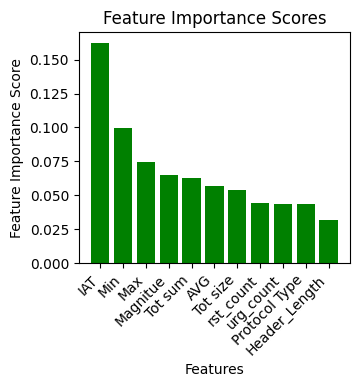

In [ ]:
import matplotlib.pyplot as plt

# Feature names and their scores
feature_names = [
    "IAT", "Min", "Max", "Magnitue", "Tot sum",
    "AVG", "Tot size", "rst_count", "urg_count", "Header_Length"
]

scores = [
    0.162126, 0.099326, 0.074741, 0.065267,
    0.062492, 0.057049, 0.053733, 0.044186,
    0.043751, 0.032110
]

# Plotting with bars vertical
plt.figure(figsize=(3.5, 3))  # Adjust the width and height as needed
plt.bar(feature_names, scores, color='green')
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.title('Feature Importance Scores')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


# 1) IAT 0.162126
# 2) Min 0.099326
# 3) Max 0.074741
# 4) Magnitue 0.065267
# 5) Tot sum 0.062492
# 6) AVG 0.057049
# 7) Tot size 0.053733
# 8) rst_count 0.044186
# 9) urg_count 0.043751
# 11) Header_Length 0.032110

<ipython-input-16-87becd68e237>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Importance Score', data=df, palette='viridis')


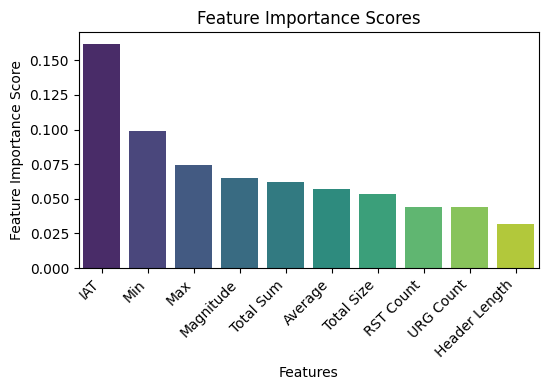

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Feature names and their scores
feature_names = [
    "IAT", "Min", "Max", "Magnitude", "Total Sum",
    "Average", "Total Size", "RST Count", "URG Count", "Header Length"
]

scores = [
    0.162126, 0.099326, 0.074741, 0.065267,
    0.062492, 0.057049, 0.053733, 0.044186,
    0.043751, 0.032110
]

# Create a DataFrame for easier plotting with seaborn
data = {
    'Feature': feature_names,
    'Importance Score': scores
}
df = pd.DataFrame(data)

# Plotting using seaborn with inverted axes and rotated labels
plt.figure(figsize=(5.5, 4))  # Adjust the width and height as needed
sns.barplot(x='Feature', y='Importance Score', data=df, palette='viridis')
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.title('Feature Importance Scores')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')  # Rotate labels by 45 degrees and align to the right

plt.tight_layout()  # Adjust plot layout to prevent overlapping elements
plt.show()


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder


csv_file_path = 'answers_binaryclass_soft_4773.csv'
df = pd.read_csv(csv_file_path)

true_labels = df['label']
predicted_labels = df['predicted_label']


label_encoder = LabelEncoder()
true_labels_encoded = label_encoder.fit_transform(true_labels)
predicted_labels_encoded = label_encoder.transform(predicted_labels)


accuracy = accuracy_score(true_labels_encoded, predicted_labels_encoded)


precision = precision_score(true_labels_encoded, predicted_labels_encoded, average='macro')
recall = recall_score(true_labels_encoded, predicted_labels_encoded, average='macro')
f1 = f1_score(true_labels_encoded, predicted_labels_encoded, average='macro')


conf_matrix = confusion_matrix(true_labels_encoded, predicted_labels_encoded)


tn = conf_matrix[0, 0]
fp = conf_matrix[0, 1]


specificity = tn / (tn + fp)


print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Specificity: {specificity:.4f}")


Accuracy: 0.9850
Precision: 0.4925
Recall: 0.5000
F1 Score: 0.4962
Specificity: 1.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#With original 200 test(binary class)
###########################################################
# For numerical balanced
# Accuracy: 0.0250
# Precision: 0.5076
# Recall: 0.5051
# F1 Score: 0.0250
# Specificity: 0.0102

#For numerical imbalanced
# Accuracy: 0.1450
# Precision: 0.4696
# Recall: 0.2377
# F1 Score: 0.1291
# Specificity: 0.1421



#Soft balanced
# Accuracy: 0.0950
# Precision: 0.5082
# Recall: 0.5406
# F1 Score: 0.0912
# Specificity: 0.0812


#Soft imbalanced
# Accuracy: 0.5450
# Precision: 0.4866
# Recall: 0.2766
# F1 Score: 0.3528
# Specificity: 0.5533




#With balanced 200 test(binary class)
###########################################################

#Numerical balanced
# Accuracy: 0.4900
# Precision: 0.3724
# Recall: 0.4900
# F1 Score: 0.3373
# Specificity: 0.0100


#Numerical Imbalanced
# Accuracy: 0.2300
# Precision: 0.2104
# Recall: 0.2300
# F1 Score: 0.2168
# Specificity: 0.1000


#Soft balanced
# Accuracy: 0.4550
# Precision: 0.3803
# Recall: 0.4550
# F1 Score: 0.3542
# Specificity: 0.0600


#Soft imbalanced
# Accuracy: 0.3050
# Precision: 0.2812
# Recall: 0.3050
# F1 Score: 0.2855
# Specificity: 0.4700


#With balanced 4900(multiclass)
##############################################################

#Numerical balanced
# Accuracy: 0.1300
# Precision: 0.1922
# Recall: 0.2343
# F1 Score: 0.2030
# Specificity: 0.5333


#Soft Imbalanced
# Accuracy: 0.1000
# Precision: 0.0379
# Recall: 0.0987
# F1 Score: 0.0440
# Specificity: 1.0000





# For the data trained with 4000s data binary class only
##############################################################
#Numeric binaryclass balanced(4000)
# Accuracy: 0.0150
# Precision: 0.0075
# Recall: 0.5000
# F1 Score: 0.0148
# Specificity: 0.0000


# Numeric binaryclass Imbalanced(4773)
# Accuracy: 0.0150
# Precision: 0.0075
# Recall: 0.5000
# F1 Score: 0.0148
# Specificity: 0.0000


# Soft Imbalanced binaryclass (4773)
# Accuracy: 0.9850
# Precision: 0.4925
# Recall: 0.5000
# F1 Score: 0.4962
# Specificity: 1.0000



#Soft Balanced binaryclass(4000)
# Accuracy: 0.0150
# Precision: 0.0075
# Recall: 0.5000
# F1 Score: 0.0148
# Specificity: 0.0000




In [ ]:
#To randomly get 200 rows of data and write them to a csv file

import pandas as pd

# Path to the original CSV file
input_csv_file = 'soft_binary_class_train_4773_balanced.csv'

# Path to save the sampled CSV file
output_csv_file = 'soft_binary_class_train_200_imbalanced.csv'

# Number of rows to sample
sample_size = 200

# Read the original CSV file into a pandas DataFrame
df = pd.read_csv(input_csv_file)

# Randomly sample 200 rows from the DataFrame
sampled_df = df.sample(n=sample_size, random_state=42)  # Set random_state for reproducibility

# Save the sampled DataFrame to a new CSV file
sampled_df.to_csv(output_csv_file, index=False)

print(f"Successfully saved {sample_size} randomly sampled rows to {output_csv_file}.")


Successfully saved 200 randomly sampled rows to soft_binary_class_train_200_imbalanced.csv.


In [ ]:
import pandas as pd

# Path to the original CSV file
input_csv_file = 'soft_binary_class_train_4000_balanced.csv'

# Path to save the sampled CSV file
output_csv_file = 'soft_binary_class_train_200_balanced.csv'

# Number of rows to sample from each class
sample_size_per_class = 100

# Read the original CSV file into a pandas DataFrame
df = pd.read_csv(input_csv_file)

# Separate the DataFrame into two subsets based on the class column
malicious_df = df[df['label'] == 'malicious']
non_malicious_df = df[df['label'] == 'non-malicious']

# Get the actual number of rows available for each class
num_malicious_rows = len(malicious_df)
num_non_malicious_rows = len(non_malicious_df)

# Determine the actual sample size for each class
actual_sample_size_malicious = min(sample_size_per_class, num_malicious_rows)
actual_sample_size_non_malicious = min(sample_size_per_class, num_non_malicious_rows)

# Randomly sample rows from each subset
sampled_malicious_df = malicious_df.sample(n=actual_sample_size_malicious, random_state=42)
sampled_non_malicious_df = non_malicious_df.sample(n=actual_sample_size_non_malicious, random_state=42)

# Concatenate the sampled DataFrames to create the final balanced DataFrame
balanced_df = pd.concat([sampled_malicious_df, sampled_non_malicious_df])

# Save the balanced DataFrame to a new CSV file
balanced_df.to_csv(output_csv_file, index=False)

print(f"Successfully saved {actual_sample_size_malicious} rows of 'malicious' and {actual_sample_size_non_malicious} rows of 'non-malicious' to {output_csv_file}.")



Successfully saved 100 rows of 'malicious' and 100 rows of 'non-malicious' to soft_binary_class_train_200_balanced.csv.
